<a href="https://colab.research.google.com/github/ronupanchal/ML_Algorithm_code/blob/main/final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data']


In [42]:
dataset= pd.read_csv('/content/sample_data/heart_data.csv')

In [43]:
type(dataset)

pandas.core.frame.DataFrame

In [44]:
dataset.shape

(213, 53)

In [45]:
dataset.head(5)

,BatchID,Year_Quarter,Age,length_of_stay,OR_time,pump_time,clamp_time,sex,WeightKg,rf_sex,...,cpb_press_epi,cpb_press_norepi,cpb_press_mb,cpb_press_neo,cpb_temp_auc,cpb_temp_mins,eGFR,CKD_stage,is_peak_at_48,target
0,1,2021Q4,64,8.0,268.0,63,44,F,91.0,1,...,0,0,0,0,4.6,13,50,3a,1,0
1,2,2021Q4,53,7.0,314.0,95,78,M,114.0,0,...,0,0,0,0,0.0,0,107,None,1,0
2,3,2021Q4,57,8.0,214.0,63,46,M,77.3,0,...,0,0,0,100,2.0,7,100,None,0,0
3,4,2021Q4,68,6.0,265.0,77,43,M,92.7,0,...,0,0,0,0,3.6,14,100,None,1,0
4,5,2021Q4,66,15.0,262.0,98,57,F,86.0,1,...,0,0,0,0,8.7,32,49,3a,0,0


In [46]:
dataset.sample(5)

,BatchID,Year_Quarter,Age,length_of_stay,OR_time,pump_time,clamp_time,sex,WeightKg,rf_sex,...,cpb_press_epi,cpb_press_norepi,cpb_press_mb,cpb_press_neo,cpb_temp_auc,cpb_temp_mins,eGFR,CKD_stage,is_peak_at_48,target
149,150,2022Q1,47,6.0,235.0,88,62,F,166.0,1,...,0,0,0,0,1.1,6,64,2,1,1
13,14,2022Q1,73,9.0,263.0,79,60,M,67.9,0,...,0,0,0,0,1.3,6,83,2,1,0
131,132,2022Q1,60,8.0,265.0,111,72,F,60.0,1,...,0,0,0,0,3.5,15,101,None,0,0
181,182,2021Q4,58,7.0,230.0,84,51,M,83.8,0,...,0,0,0,0,4.8,20,71,2,1,0
49,50,2021Q4,52,9.0,218.0,65,41,F,75.5,1,...,0,0,0,1200,1.7,12,62,2,1,0


In [47]:
dataset['Year_Quarter'] = dataset['Year_Quarter'].str.split('Q').str[0]

In [48]:
dataset['Year_Quarter'] = dataset['Year_Quarter'].apply(lambda x: float(x.split()[0].replace('F', '')))


In [49]:
#dataset['Year_Quarter']=dataset['Year_Quarter'].astype(float)
#dataset['BatchID']=dataset['BatchID'].astype(float)
# Remove two columns name is 'C' and 'D'
dataset.drop(['BatchID', 'Year_Quarter','sex'], axis=1)

,Age,length_of_stay,OR_time,pump_time,clamp_time,WeightKg,rf_sex,is_redo,is_diabetic,bsa,...,cpb_press_epi,cpb_press_norepi,cpb_press_mb,cpb_press_neo,cpb_temp_auc,cpb_temp_mins,eGFR,CKD_stage,is_peak_at_48,target
0,64,8.0,268.0,63,44,91.0,1,0.0,0,1.87,...,0,0,0,0,4.6,13,50,3a,1,0
1,53,7.0,314.0,95,78,114.0,0,0.0,0,2.42,...,0,0,0,0,0.0,0,107,None,1,0
2,57,8.0,214.0,63,46,77.3,0,0.0,0,1.99,...,0,0,0,100,2.0,7,100,None,0,0
3,68,6.0,265.0,77,43,92.7,0,0.0,0,2.11,...,0,0,0,0,3.6,14,100,None,1,0
4,66,15.0,262.0,98,57,86.0,1,0.0,1,1.92,...,0,0,0,0,8.7,32,49,3a,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,60,15.0,218.0,37,23,130.0,1,0.0,1,2.33,...,0,0,0,0,0.7,3,7,5,0,0
209,57,9.0,NaN,65,49,116.0,1,NaN,0,2.22,...,0,0,0,0,0.0,0,6,5,0,0
210,77,6.0,188.0,74,60,77.7,0,0.0,1,1.89,...,0,0,0,0,2.3,12,90,None,0,0
211,52,11.0,NaN,92,76,89.7,0,0.0,0,2.10,...,0,0,0,0,0.0,0,68,2,1,0


In [50]:
dataset.head()

,BatchID,Year_Quarter,Age,length_of_stay,OR_time,pump_time,clamp_time,sex,WeightKg,rf_sex,...,cpb_press_epi,cpb_press_norepi,cpb_press_mb,cpb_press_neo,cpb_temp_auc,cpb_temp_mins,eGFR,CKD_stage,is_peak_at_48,target
0,1,2021.0,64,8.0,268.0,63,44,F,91.0,1,...,0,0,0,0,4.6,13,50,3a,1,0
1,2,2021.0,53,7.0,314.0,95,78,M,114.0,0,...,0,0,0,0,0.0,0,107,None,1,0
2,3,2021.0,57,8.0,214.0,63,46,M,77.3,0,...,0,0,0,100,2.0,7,100,None,0,0
3,4,2021.0,68,6.0,265.0,77,43,M,92.7,0,...,0,0,0,0,3.6,14,100,None,1,0
4,5,2021.0,66,15.0,262.0,98,57,F,86.0,1,...,0,0,0,0,8.7,32,49,3a,0,0


In [51]:
dataset.describe()

,BatchID,Year_Quarter,Age,length_of_stay,OR_time,pump_time,clamp_time,WeightKg,rf_sex,is_redo,...,cpb_map_auc,cpb_press_epi,cpb_press_norepi,cpb_press_mb,cpb_press_neo,cpb_temp_auc,cpb_temp_mins,eGFR,is_peak_at_48,target
count,213.000000,213.000000,213.000000,208.000000,210.000000,213.000000,213.000000,213.000000,213.000000,193.000000,...,193.000000,213.0,213.0,213.0,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,107.000000,2021.511737,63.239437,10.485577,266.128571,94.591549,61.718310,89.445540,0.347418,0.056995,...,27.295337,0.0,0.0,0.0,308.450704,3.712676,12.769953,75.333333,0.549296,0.215962
std,61.631972,0.501040,12.685750,8.084684,60.422338,33.872922,25.943616,22.972187,0.477272,0.232436,...,51.272971,0.0,0.0,0.0,698.970904,3.248582,10.046526,23.641518,0.498736,0.412458
min,1.000000,2021.000000,19.000000,1.000000,144.000000,31.000000,0.000000,48.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,54.000000,2021.000000,56.000000,6.000000,226.500000,72.000000,45.000000,73.000000,0.000000,0.000000,...,2.000000,0.0,0.0,0.0,0.000000,1.300000,5.000000,61.000000,0.000000,0.000000
50%,107.000000,2022.000000,65.000000,8.000000,257.500000,89.000000,58.000000,87.000000,0.000000,0.000000,...,11.000000,0.0,0.0,0.0,100.000000,2.700000,11.000000,76.000000,1.000000,0.000000
75%,160.000000,2022.000000,73.000000,12.000000,291.000000,112.000000,71.000000,102.000000,1.000000,0.000000,...,32.000000,0.0,0.0,0.0,300.000000,5.300000,19.000000,94.000000,1.000000,0.000000
max,213.000000,2022.000000,88.000000,58.000000,602.000000,281.000000,153.000000,213.000000,1.000000,1.000000,...,475.000000,0.0,0.0,0.0,6900.000000,14.800000,45.000000,124.000000,1.000000,1.000000


In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BatchID             213 non-null    int64  
 1   Year_Quarter        213 non-null    float64
 2   Age                 213 non-null    int64  
 3   length_of_stay      208 non-null    float64
 4   OR_time             210 non-null    float64
 5   pump_time           213 non-null    int64  
 6   clamp_time          213 non-null    int64  
 7   sex                 213 non-null    object 
 8   WeightKg            213 non-null    float64
 9   rf_sex              213 non-null    int64  
 10  is_redo             193 non-null    float64
 11  is_diabetic         213 non-null    int64  
 12  bsa                 213 non-null    float64
 13  CaseStatus          213 non-null    object 
 14  is_Elective         213 non-null    int64  
 15  is_Emergent         213 non-null    int64  
 16  is_Urgen

In [53]:
#info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



#for i in range(len(info)):
#    print(dataset.columns[i]+":\t\t\t"+info[i])

In [54]:
#dataset["target"].describe()

In [55]:
dataset["target"].unique()

array([0, 1])

In [56]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target                1.000000
creat_48hours_peak    0.332583
creat_postOp_peak     0.258985
length_of_stay        0.189867
ckd_stage_4           0.185504
bsa                   0.179452
OR_time               0.167907
rf_sex                0.167283
is_redo               0.145518
WeightKg              0.141636
cpb_dO2i_auc          0.140631
eGFR                  0.138026
cpb_map_mins          0.136935
is_Emergent           0.136360
avg_MAP               0.130520
clamp_time            0.118119
BatchID               0.117829
pump_time             0.111682
cpb_dO2i_mins         0.096968
Age                   0.083827
ckd_stage_3a          0.082778
hct_low_cpb           0.080701
is_Urgent             0.077417
cpb_map_auc           0.073284
ckd_none              0.070737
cpb_temp_mins         0.068776
cpb_press_neo         0.064813
is_valve              0.062999
hct_1st_or            0.062567
ckd_stage_3b          0.048562
avg_dO2i              0.043360
is_cab_valve          0.035823
ckd_stag

In [57]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=70,random_state=30)

In [58]:
X_train

,BatchID,Year_Quarter,Age,length_of_stay,OR_time,pump_time,clamp_time,sex,WeightKg,rf_sex,...,cpb_map_auc,cpb_press_epi,cpb_press_norepi,cpb_press_mb,cpb_press_neo,cpb_temp_auc,cpb_temp_mins,eGFR,CKD_stage,is_peak_at_48
160,161,2021.0,58,10.0,266.0,85,62,F,54.0,1,...,71.0,0,0,0,700,9.6,18,107,None,0
42,43,2021.0,63,5.0,222.0,68,39,M,97.7,0,...,96.0,0,0,0,100,1.1,5,66,2,1
92,93,2021.0,76,5.0,198.0,74,58,F,68.0,1,...,11.0,0,0,0,500,3.7,15,96,None,0
157,158,2021.0,67,18.0,254.0,77,65,M,98.6,0,...,0.0,0,0,0,0,0.0,0,60,2,1
31,32,2022.0,54,6.0,254.0,89,70,F,109.0,1,...,12.0,0,0,0,500,0.0,0,55,3a,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,141,2021.0,66,6.0,220.0,83,53,M,101.0,0,...,14.0,0,0,0,100,2.4,9,86,2,0
45,46,2021.0,67,8.0,235.0,92,70,F,89.8,1,...,1.0,0,0,0,100,0.4,4,63,2,0
173,174,2021.0,67,NaN,294.0,115,61,M,87.6,0,...,1.0,0,0,0,0,8.0,25,100,None,0
165,166,2022.0,62,11.0,264.0,95,62,F,90.0,1,...,29.0,0,0,0,100,5.1,24,63,2,0


In [59]:
X_train.drop(['BatchID', 'Year_Quarter','sex'], axis=1)

,Age,length_of_stay,OR_time,pump_time,clamp_time,WeightKg,rf_sex,is_redo,is_diabetic,bsa,...,cpb_map_auc,cpb_press_epi,cpb_press_norepi,cpb_press_mb,cpb_press_neo,cpb_temp_auc,cpb_temp_mins,eGFR,CKD_stage,is_peak_at_48
160,58,10.0,266.0,85,62,54.0,1,0.0,0,1.49,...,71.0,0,0,0,700,9.6,18,107,None,0
42,63,5.0,222.0,68,39,97.7,0,0.0,1,2.06,...,96.0,0,0,0,100,1.1,5,66,2,1
92,76,5.0,198.0,74,58,68.0,1,0.0,0,1.71,...,11.0,0,0,0,500,3.7,15,96,None,0
157,67,18.0,254.0,77,65,98.6,0,0.0,0,2.16,...,0.0,0,0,0,0,0.0,0,60,2,1
31,54,6.0,254.0,89,70,109.0,1,0.0,0,2.07,...,12.0,0,0,0,500,0.0,0,55,3a,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,66,6.0,220.0,83,53,101.0,0,0.0,0,2.20,...,14.0,0,0,0,100,2.4,9,86,2,0
45,67,8.0,235.0,92,70,89.8,1,0.0,0,1.99,...,1.0,0,0,0,100,0.4,4,63,2,0
173,67,NaN,294.0,115,61,87.6,0,0.0,0,2.14,...,1.0,0,0,0,0,8.0,25,100,None,0
165,62,11.0,264.0,95,62,90.0,1,0.0,1,1.99,...,29.0,0,0,0,100,5.1,24,63,2,0


In [60]:
X_test

,BatchID,Year_Quarter,Age,length_of_stay,OR_time,pump_time,clamp_time,sex,WeightKg,rf_sex,...,cpb_map_auc,cpb_press_epi,cpb_press_norepi,cpb_press_mb,cpb_press_neo,cpb_temp_auc,cpb_temp_mins,eGFR,CKD_stage,is_peak_at_48
147,148,2022.0,64,1.0,180.0,70,54,M,63.0,0,...,5.0,0,0,0,0,5.2,16,79,2,1
96,97,2022.0,79,7.0,277.0,85,49,M,112.0,0,...,27.0,0,0,0,100,1.5,5,89,2,1
101,102,2021.0,64,6.0,190.0,45,28,M,108.0,0,...,NaN,0,0,0,0,1.2,4,101,None,0
183,184,2022.0,69,15.0,362.0,178,138,M,98.0,0,...,0.0,0,0,0,0,0.2,2,64,2,1
125,126,2022.0,65,4.0,281.0,112,72,M,98.1,0,...,5.0,0,0,0,200,10.8,30,63,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,2021.0,68,6.0,265.0,77,43,M,92.7,0,...,NaN,0,0,0,0,3.6,14,100,None,1
155,156,2022.0,59,9.0,323.0,130,105,M,83.1,0,...,16.0,0,0,0,100,8.2,21,68,2,0
171,172,2021.0,60,7.0,161.0,32,19,F,84.0,1,...,5.0,0,0,0,100,1.6,5,82,2,0
2,3,2021.0,57,8.0,214.0,63,46,M,77.3,0,...,14.0,0,0,0,100,2.0,7,100,None,0


In [61]:
X_test=X_test.drop(['BatchID', 'Year_Quarter','sex','CaseStatus','proc_high_cat','proc_mid_cat','proc_low_cat','CKD_stage','OR_time','hct_1st_or','hct_low_cpb','avg_CI'], axis=1)

In [62]:
X_train

,BatchID,Year_Quarter,Age,length_of_stay,OR_time,pump_time,clamp_time,sex,WeightKg,rf_sex,...,cpb_map_auc,cpb_press_epi,cpb_press_norepi,cpb_press_mb,cpb_press_neo,cpb_temp_auc,cpb_temp_mins,eGFR,CKD_stage,is_peak_at_48
160,161,2021.0,58,10.0,266.0,85,62,F,54.0,1,...,71.0,0,0,0,700,9.6,18,107,None,0
42,43,2021.0,63,5.0,222.0,68,39,M,97.7,0,...,96.0,0,0,0,100,1.1,5,66,2,1
92,93,2021.0,76,5.0,198.0,74,58,F,68.0,1,...,11.0,0,0,0,500,3.7,15,96,None,0
157,158,2021.0,67,18.0,254.0,77,65,M,98.6,0,...,0.0,0,0,0,0,0.0,0,60,2,1
31,32,2022.0,54,6.0,254.0,89,70,F,109.0,1,...,12.0,0,0,0,500,0.0,0,55,3a,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,141,2021.0,66,6.0,220.0,83,53,M,101.0,0,...,14.0,0,0,0,100,2.4,9,86,2,0
45,46,2021.0,67,8.0,235.0,92,70,F,89.8,1,...,1.0,0,0,0,100,0.4,4,63,2,0
173,174,2021.0,67,NaN,294.0,115,61,M,87.6,0,...,1.0,0,0,0,0,8.0,25,100,None,0
165,166,2022.0,62,11.0,264.0,95,62,F,90.0,1,...,29.0,0,0,0,100,5.1,24,63,2,0


In [63]:
X_train=X_train.drop(['BatchID', 'Year_Quarter','sex','CaseStatus','proc_high_cat','proc_mid_cat','proc_low_cat','CKD_stage','OR_time','hct_1st_or','hct_low_cpb','avg_CI'], axis=1)

In [64]:
X_train = X_train.dropna(axis=1)
X_test = X_test.dropna(axis=1)


In [65]:
X_test

,Age,pump_time,clamp_time,WeightKg,rf_sex,is_diabetic,bsa,is_Elective,is_Emergent,is_Urgent,...,cpb_dO2i_auc,cpb_dO2i_mins,cpb_press_epi,cpb_press_norepi,cpb_press_mb,cpb_press_neo,cpb_temp_auc,cpb_temp_mins,eGFR,is_peak_at_48
147,64,70,54,63.0,0,0,1.83,1,0,0,...,325,3,0,0,0,0,5.2,16,79,1
96,79,85,49,112.0,0,0,2.26,1,0,0,...,3,1,0,0,0,100,1.5,5,89,1
101,64,45,28,108.0,0,0,2.32,0,1,0,...,113,2,0,0,0,0,1.2,4,101,0
183,69,178,138,98.0,0,0,2.11,1,0,0,...,1462,73,0,0,0,0,0.2,2,64,1
125,65,112,72,98.1,0,0,2.09,1,0,0,...,100,9,0,0,0,200,10.8,30,63,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,68,77,43,92.7,0,0,2.11,1,0,0,...,1885,45,0,0,0,0,3.6,14,100,1
155,59,130,105,83.1,0,0,1.97,1,0,0,...,495,28,0,0,0,100,8.2,21,68,0
171,60,32,19,84.0,1,1,1.89,0,0,1,...,1,1,0,0,0,100,1.6,5,82,0
2,57,63,46,77.3,0,0,1.99,1,0,0,...,1294,34,0,0,0,100,2.0,7,100,0


In [66]:
X_train = X_train.dropna(axis=1)

In [67]:
X_train

,Age,pump_time,clamp_time,WeightKg,rf_sex,is_diabetic,bsa,is_Elective,is_Emergent,is_Urgent,...,cpb_dO2i_auc,cpb_dO2i_mins,cpb_press_epi,cpb_press_norepi,cpb_press_mb,cpb_press_neo,cpb_temp_auc,cpb_temp_mins,eGFR,is_peak_at_48
160,58,85,62,54.0,1,0,1.49,1,0,0,...,3608,36,0,0,0,700,9.6,18,107,0
42,63,68,39,97.7,0,1,2.06,1,0,0,...,0,0,0,0,0,100,1.1,5,66,1
92,76,74,58,68.0,1,0,1.71,1,0,0,...,0,0,0,0,0,500,3.7,15,96,0
157,67,77,65,98.6,0,0,2.16,1,0,0,...,0,0,0,0,0,0,0.0,0,60,1
31,54,89,70,109.0,1,0,2.07,1,0,0,...,764,28,0,0,0,500,0.0,0,55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,66,83,53,101.0,0,0,2.20,1,0,0,...,100,1,0,0,0,100,2.4,9,86,0
45,67,92,70,89.8,1,0,1.99,1,0,0,...,81,4,0,0,0,100,0.4,4,63,0
173,67,115,61,87.6,0,0,2.14,1,0,0,...,57,2,0,0,0,0,8.0,25,100,0
165,62,95,62,90.0,1,1,1.99,1,0,0,...,0,0,0,0,0,100,5.1,24,63,0


In [68]:
X_test=X_test.dropna()

In [69]:
Y_train

160    1
42     0
92     0
157    1
31     0
      ..
140    0
45     0
173    0
165    0
37     0
Name: target, Length: 143, dtype: int64

In [70]:
Y_train=Y_train.dropna()

In [71]:
Y_test

147    0
96     0
101    0
183    1
125    0
      ..
3      0
155    1
171    0
2      0
136    0
Name: target, Length: 70, dtype: int64

In [72]:
Y_test=Y_test.dropna()

In [73]:
X_train

,Age,pump_time,clamp_time,WeightKg,rf_sex,is_diabetic,bsa,is_Elective,is_Emergent,is_Urgent,...,cpb_dO2i_auc,cpb_dO2i_mins,cpb_press_epi,cpb_press_norepi,cpb_press_mb,cpb_press_neo,cpb_temp_auc,cpb_temp_mins,eGFR,is_peak_at_48
160,58,85,62,54.0,1,0,1.49,1,0,0,...,3608,36,0,0,0,700,9.6,18,107,0
42,63,68,39,97.7,0,1,2.06,1,0,0,...,0,0,0,0,0,100,1.1,5,66,1
92,76,74,58,68.0,1,0,1.71,1,0,0,...,0,0,0,0,0,500,3.7,15,96,0
157,67,77,65,98.6,0,0,2.16,1,0,0,...,0,0,0,0,0,0,0.0,0,60,1
31,54,89,70,109.0,1,0,2.07,1,0,0,...,764,28,0,0,0,500,0.0,0,55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,66,83,53,101.0,0,0,2.20,1,0,0,...,100,1,0,0,0,100,2.4,9,86,0
45,67,92,70,89.8,1,0,1.99,1,0,0,...,81,4,0,0,0,100,0.4,4,63,0
173,67,115,61,87.6,0,0,2.14,1,0,0,...,57,2,0,0,0,0,8.0,25,100,0
165,62,95,62,90.0,1,1,1.99,1,0,0,...,0,0,0,0,0,100,5.1,24,63,0


In [74]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn import metrics

In [75]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
      max_accuracy = current_accuracy
      best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [76]:
Y_pred_rf.shape

(70,)

In [77]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Randomforestclassifier is: "+str(score_rf)+" %")

The accuracy score achieved using Randomforestclassifier is: 90.0 %


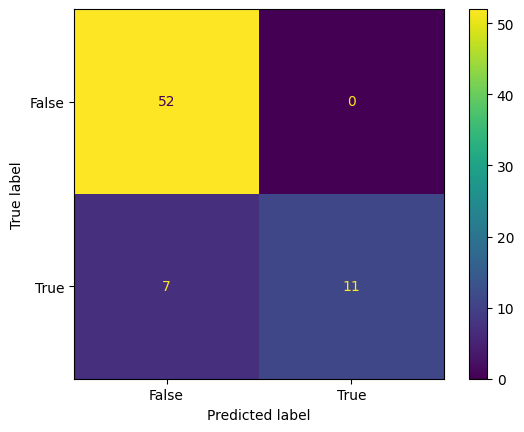

In [78]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred_rf)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [94]:
#wrongly predicted data 

list_wrongly_predict_rows = []
for row_index, (input, prediction, label) in enumerate(zip (X_test, Y_pred_rf, Y_test)):
  if prediction != label:
    print('wrongly predicted Row', row_index, 'has been classified as ', prediction, 'and should be ', label)
    list_wrongly_predict_rows.append(row_index)
    # Using the operator .iloc[]
    # to select multiple rows
    df_wrongly_pred_res = X_test.iloc[list_wrongly_predict_rows]
    
# saving the dataframe
#df.to_csv('file1.csv')
    
#list_wrongly_predict_rows

wrongly predicted Row 14 has been classified as  0 and should be  1
wrongly predicted Row 16 has been classified as  0 and should be  1
wrongly predicted Row 30 has been classified as  0 and should be  1


In [95]:
df_wrongly_pred_res.head()

,Age,pump_time,clamp_time,WeightKg,rf_sex,is_diabetic,bsa,is_Elective,is_Emergent,is_Urgent,...,cpb_dO2i_auc,cpb_dO2i_mins,cpb_press_epi,cpb_press_norepi,cpb_press_mb,cpb_press_neo,cpb_temp_auc,cpb_temp_mins,eGFR,is_peak_at_48
21,86,78,53,64.0,0,0,1.82,1,0,0,...,0,0,0,0,0,0,7.3,20,63,1
26,78,101,59,86.2,0,0,2.00,1,0,0,...,0,0,0,0,0,0,8.7,28,95,1
117,75,70,44,119.0,0,1,2.43,0,1,0,...,0,0,0,0,0,0,0.0,0,67,0


In [96]:
df_wrongly_pred_res.to_csv('wrongly_pred_res.csv')

In [98]:
#correctly predicted data 
list_correctly_predict_rows = []
for row_index, (input, prediction, label) in enumerate(zip (X_test, Y_pred_rf, Y_test)):
  if prediction == label:
    print('correctly predicted Row', row_index, 'has been classified as ', prediction, 'and should be ', label)
    list_correctly_predict_rows.append(row_index)
    # Using the operator .iloc[]
    # to select multiple rows
    df_correctly_pred_res = X_test.iloc[list_correctly_predict_rows]

correctly predicted Row 0 has been classified as  0 and should be  0
correctly predicted Row 1 has been classified as  0 and should be  0
correctly predicted Row 2 has been classified as  0 and should be  0
correctly predicted Row 3 has been classified as  1 and should be  1
correctly predicted Row 4 has been classified as  0 and should be  0
correctly predicted Row 5 has been classified as  0 and should be  0
correctly predicted Row 6 has been classified as  0 and should be  0
correctly predicted Row 7 has been classified as  0 and should be  0
correctly predicted Row 8 has been classified as  0 and should be  0
correctly predicted Row 9 has been classified as  0 and should be  0
correctly predicted Row 10 has been classified as  0 and should be  0
correctly predicted Row 11 has been classified as  0 and should be  0
correctly predicted Row 12 has been classified as  0 and should be  0
correctly predicted Row 13 has been classified as  0 and should be  0
correctly predicted Row 15 has

In [99]:
df_correctly_pred_res.head()

,Age,pump_time,clamp_time,WeightKg,rf_sex,is_diabetic,bsa,is_Elective,is_Emergent,is_Urgent,...,cpb_dO2i_auc,cpb_dO2i_mins,cpb_press_epi,cpb_press_norepi,cpb_press_mb,cpb_press_neo,cpb_temp_auc,cpb_temp_mins,eGFR,is_peak_at_48
147,64,70,54,63.0,0,0,1.83,1,0,0,...,325,3,0,0,0,0,5.2,16,79,1
96,79,85,49,112.0,0,0,2.26,1,0,0,...,3,1,0,0,0,100,1.5,5,89,1
101,64,45,28,108.0,0,0,2.32,0,1,0,...,113,2,0,0,0,0,1.2,4,101,0
183,69,178,138,98.0,0,0,2.11,1,0,0,...,1462,73,0,0,0,0,0.2,2,64,1
125,65,112,72,98.1,0,0,2.09,1,0,0,...,100,9,0,0,0,200,10.8,30,63,1


In [100]:
df_correctly_pred_res.to_csv('correctly_pred_res.csv')